In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Quantization

Q1

In [ ]:
#Open the image as greyscale
im = Image.open(r"./Truman_receives_menorah.jpg").convert('L')

[2183, 4545, 3556, 2419, 2096, 1969, 2043, 2092, 2180, 2364, 2592, 2801, 2974, 3187, 3624, 4151, 4541, 4928, 5006, 5034, 4924, 4592, 4769, 4643, 4766, 4964, 5028, 5441, 5677, 6167, 6465, 6634, 6525, 6595, 6558, 6558, 6589, 6504, 6440, 6468, 6286, 6107, 6001, 5839, 5686, 5551, 5426, 5358, 5130, 4978, 4952, 4767, 4734, 4593, 4536, 4452, 4387, 4143, 3905, 4053, 3787, 3770, 3671, 3550, 3598, 3657, 3780, 3792, 3723, 3751, 3799, 3724, 3783, 3579, 3567, 3540, 3522, 3585, 3553, 3662, 3822, 3934, 4074, 4216, 4354, 4803, 4727, 4946, 4944, 5072, 5312, 5583, 5767, 5928, 6038, 6349, 6483, 6626, 6598, 6888, 6842, 7130, 7339, 7813, 8353, 8473, 8561, 8698, 8784, 8839, 8621, 8652, 8385, 7983, 8117, 7899, 7779, 7610, 7523, 7387, 7018, 6864, 6699, 6609, 6482, 6486, 6166, 6347, 6198, 6152, 6092, 6275, 6423, 6571, 6711, 6989, 7374, 7619, 7653, 7482, 7461, 7399, 7285, 7279, 7306, 7176, 7203, 7327, 7226, 7109, 6827, 6966, 6901, 6798, 6528, 6443, 6116, 6167, 5791, 5661, 5751, 5957, 5910, 5864, 5711, 5744, 555

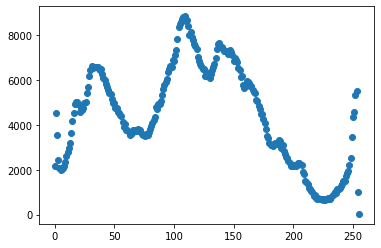

In [ ]:
#We normalize the distribution of pixels of each colour in the greyscale image
#Thus an xpproximation of the pdf is achieved
num_of_pixels = im.size[0] * im.size[1]
hist = pd.Series(im.histogram())
pdf = hist.apply(lambda x: x/num_of_pixels)

# plotting the histogram for clause 1
plt.scatter(hist.index, hist)

In [ ]:
print(num_of_pixels)

1138800


Q2. a)

for b = 1: 1499.3780874604845
for b = 2: 319.1266508605549
for b = 3: 84.34553389532843
for b = 4: 21.239724271162626
for b = 5: 5.206945907973306
for b = 6: 1.2472971548998946
for b = 7: 0.2500000000000002
for b = 8: 0.0


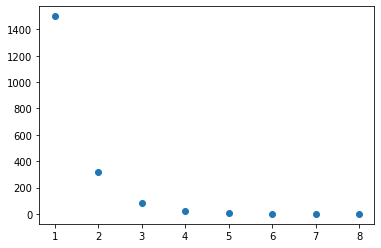

In [ ]:
def uni_quantize(pixel_color, interval_size, start_of_d_l):
    """ Returns the uniform quantizer for the received pixel_color."""
    return interval_size*((pixel_color-start_of_d_l)//interval_size + 0.5) + start_of_d_l

def mse_term(pixel_color, pixel_quantization):
    """ Returns the MSE term. """
    return np.power(pixel_color-pixel_quantization, 2)

def mse_uniform(pdf, function_range, num_of_intervals, start_of_decision_boundries):
    """ Returns the total uniform MSE by calculating the weighted sum of the MSE terms.
        This calculation is equivalent to summing all the terms of the image pixels and dividing it by the total
        number of pixels in the image. """
    total_mse = 0
    for color in range(len(pdf)):
        total_mse += pdf[color] * mse_term(color, uni_quantize(color, function_range / num_of_intervals, start_of_decision_boundries))
    return total_mse


mse_for_b_bits = [0] * 8  # the array in which we will store the MSE for every b
start_of_decision_boundries = -0.5
function_range = 256
# filling the array for every b
for b in range(1,9):
    num_of_intervals = np.power(2, b)
    mse_for_b_bits[b-1] = mse_uniform(pdf, function_range, num_of_intervals, start_of_decision_boundries)
    print("for b = %s: %s" % (b, mse_for_b_bits[b-1]) )

mse_for_b_bits_uni_series = pd.Series(mse_for_b_bits)
plt.scatter(mse_for_b_bits_uni_series.index + 1, mse_for_b_bits_uni_series)

Q2. b)

In [ ]:
def get_uni_boundries(b, func_range):
    """ Returns an array with the uniform boundaried (decision levels),
        with the lowest boundary at -0.5."""
    uni_boundries = [-0.5]
    num_of_reps = np.power(2,b)
    interval_size = func_range / num_of_reps

    for i in range(num_of_reps):
        uni_boundries.append(uni_boundries[i] + interval_size)
    
    return uni_boundries

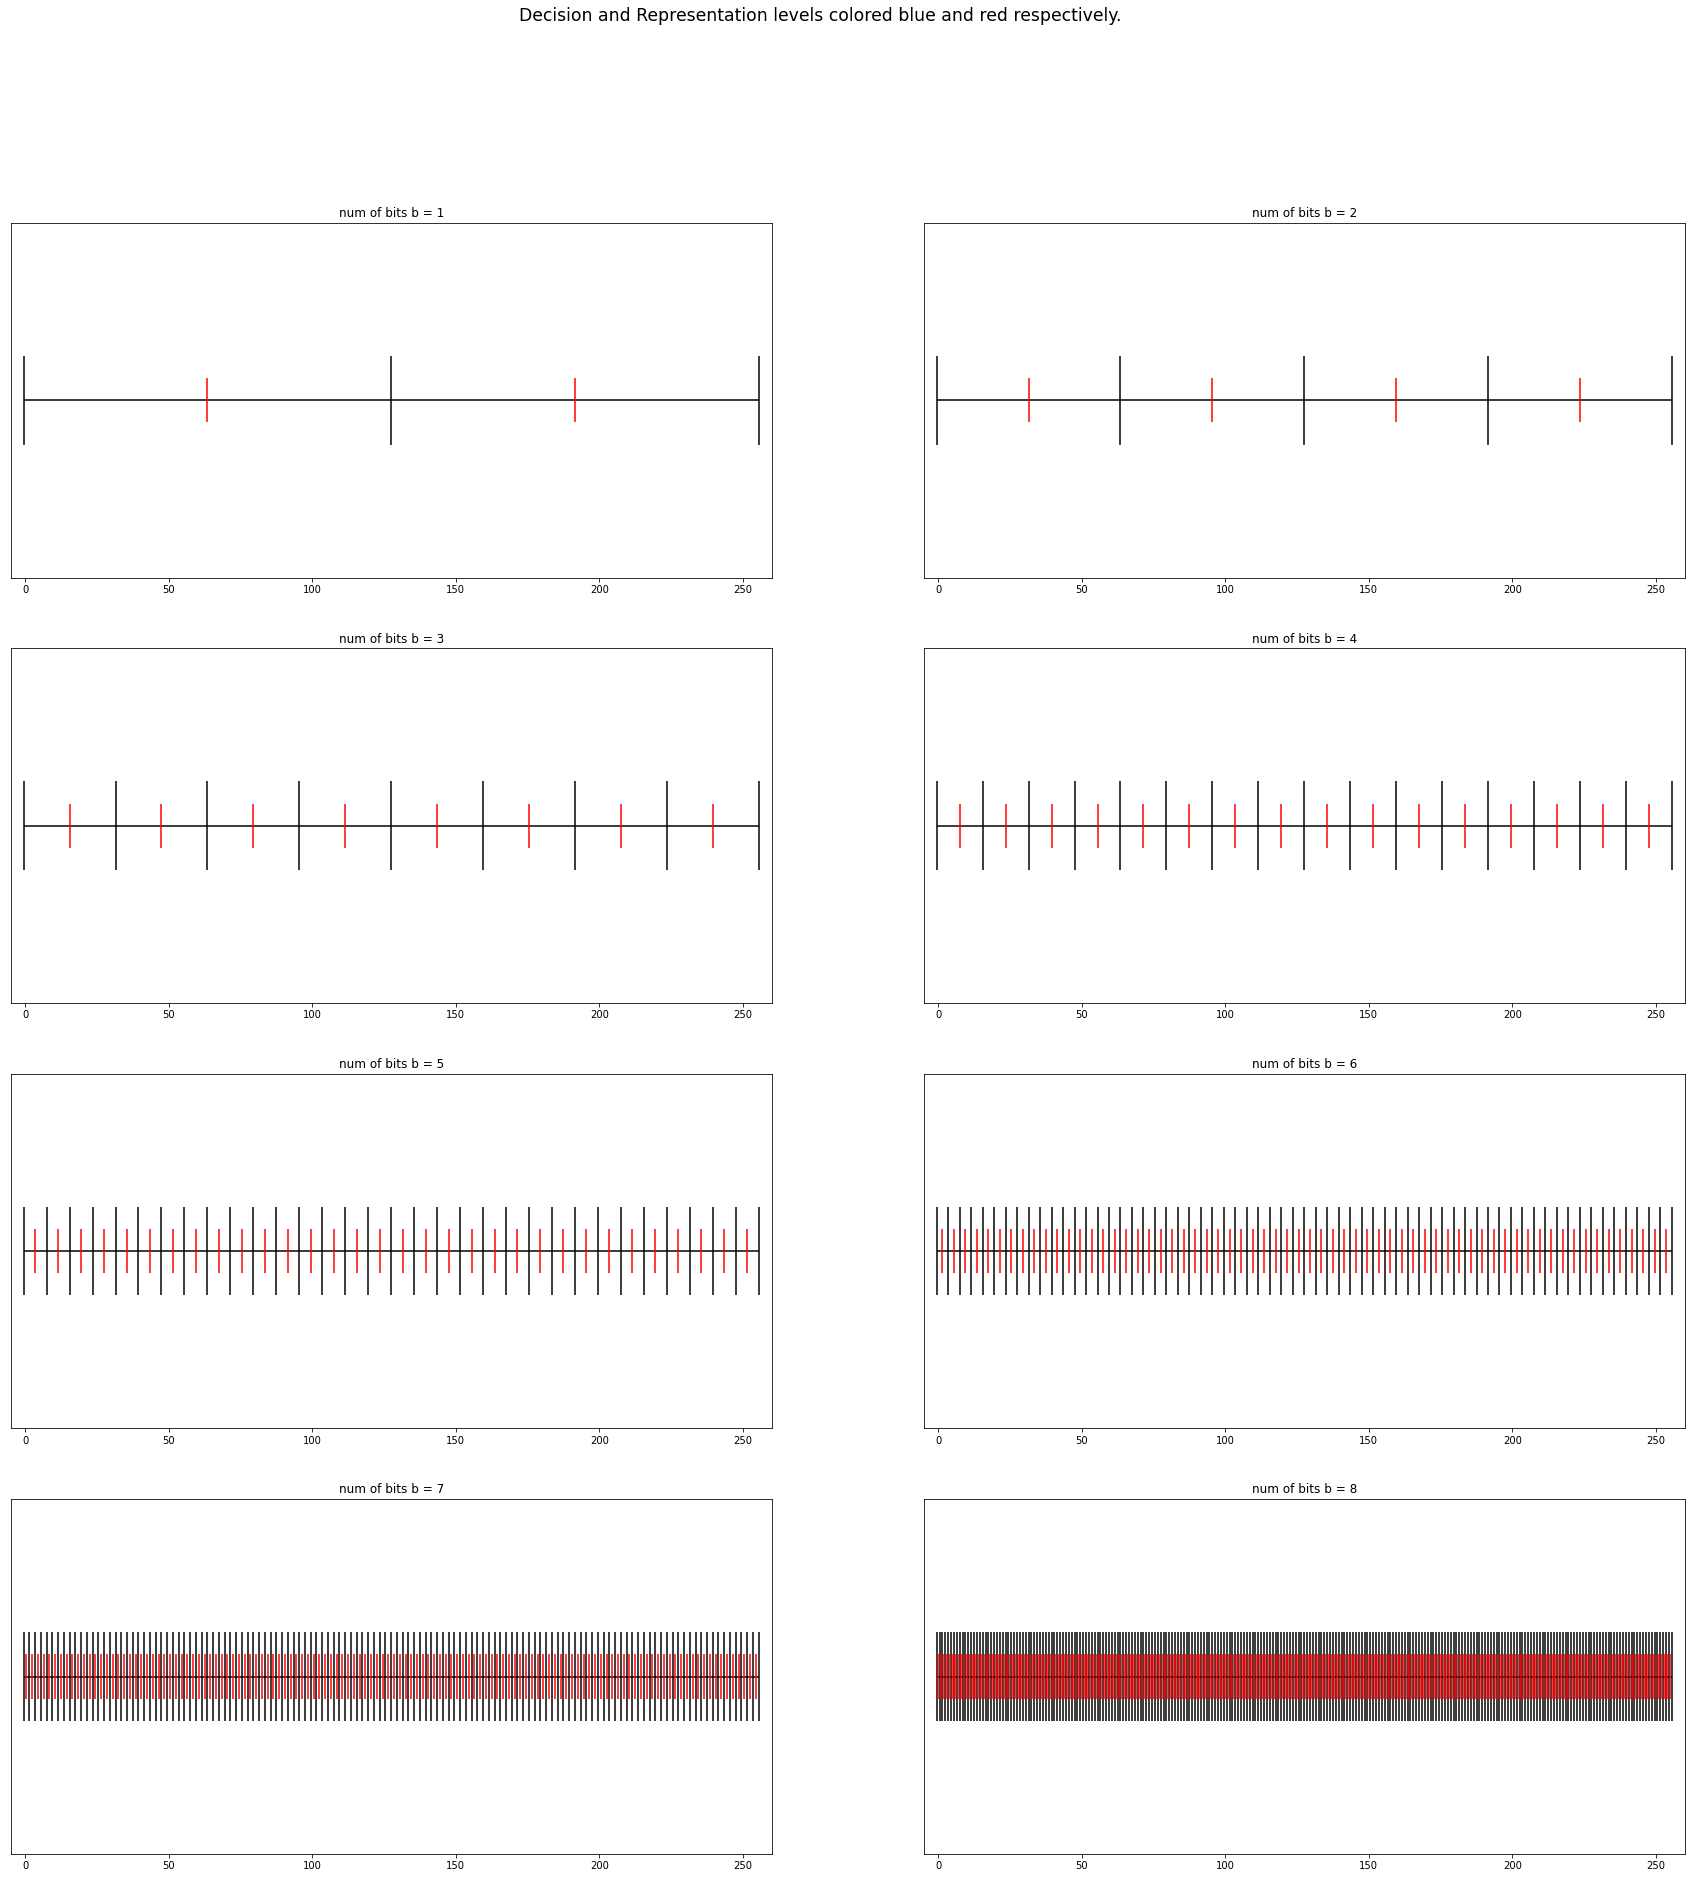

In [ ]:
uni_boundries = [get_uni_boundries(b, 256) for b in range(1,9)]

uni_reps = [[], [], [], [], [], [], [], []]  # a list of lists containing the uniform represantation levels for every b
for b in range(1,9):
    for i in range(len(uni_boundries[b-1])-1):
        # the representator is in the middle of the interval
        uni_reps[b-1].append((uni_boundries[b-1][i]+uni_boundries[b-1][i+1])/2)

# set up the figure
def plot_quantization(boundries_list, reps_list):
    fig = plt.figure(figsize=(30, 30))
    fig.suptitle("Decision and Representation levels colored blue and red respectively.", size="xx-large")
    for b in range(1,9):
        ax = fig.add_subplot(4,2,b)
        ax.set_xlim(-5,260)
        ax.set_ylim(0,4)

        ax.set_title("num of bits b = %d" % (b))

        # draw lines
        xmin = -0.5
        xmax = 255.5
        y = 2
        height = 1

        plt.hlines(y, xmin, xmax)

        plt.vlines(boundries_list[b-1], y - height / 2., y + height / 2.)

        plt.vlines(reps_list[b-1], y - height / 4., y + height / 4., linestyles="solid", colors="blue")
        ax.get_yaxis().set_visible(False)
    # plt.tight_layout()
    plt.show()

plot_quantization(uni_boundries, uni_reps)

Q3.

In [ ]:
def calculate_r_i(pdf, lower_boundry, higher_boundry):
    """ Returns the representator/quantizer of the interval."""
    weighted_sum = 0
    prob_sum = 0
    i = np.ceil(lower_boundry)
    while i < higher_boundry:
        weighted_sum += i*pdf[i]
        prob_sum += pdf[i]
        i+=1
    return weighted_sum / prob_sum


def ml_quantizer(color, decision_levels, rep_levels):
    """ Returns the value of Q(color)."""
    for i in range(len(decision_levels) - 1):
        if decision_levels[i] <=color and color < decision_levels[i+1]:
            # found the color's interval, return its representator
            return rep_levels[i]


def mse_ml(pdf, decision_levels, rep_levels):
    """ Returns the total MSE for the given quatization.
        This calculation is equivalent to summing all the terms of the image pixels and dividing it by the total
        number of pixels in the image."""
    total_mse = 0
    for color in range(len(pdf)):
        total_mse += pdf[color] * mse_term(color, ml_quantizer(color, decision_levels, rep_levels))
    return total_mse

#initial d contains j+1 values, where the first and last are phi low and high respectively
def max_loyd(pdf, initial_d, epsilon):
    d = initial_d
    r = [calculate_r_i(pdf, d[i], d[i+1]) for i in range(len(d) - 1)]
    last_mse = mse_ml(pdf, d, r)
    curr_mse = last_mse
    last_diff = epsilon
    while(last_diff>=epsilon):  # will stop iterating when the diff improves by less than epsilon
        for i in range(len(r)):
            if i!=0:
                d[i] = (r[i-1]+r[i])/2
        r = [calculate_r_i(pdf, d[i], d[i+1]) for i in range(len(d) - 1)]
        last_mse = curr_mse
        curr_mse = mse_ml(pdf, d, r)
        last_diff = last_mse - curr_mse
    return r,d,curr_mse
    

Q4. a+b)

for b = 1: 1232.1120718319123
for b = 2: 297.5497108912991
for b = 3: 76.02411774859655
for b = 4: 20.841106053081774
for b = 5: 5.175351900529969
for b = 6: 1.2373538078451563
for b = 7: 0.24943846163111635
for b = 8: 2.547388693050799e-29


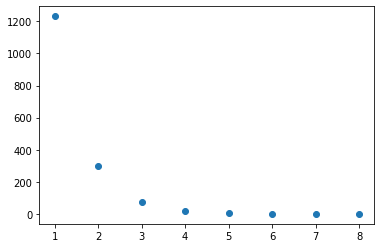

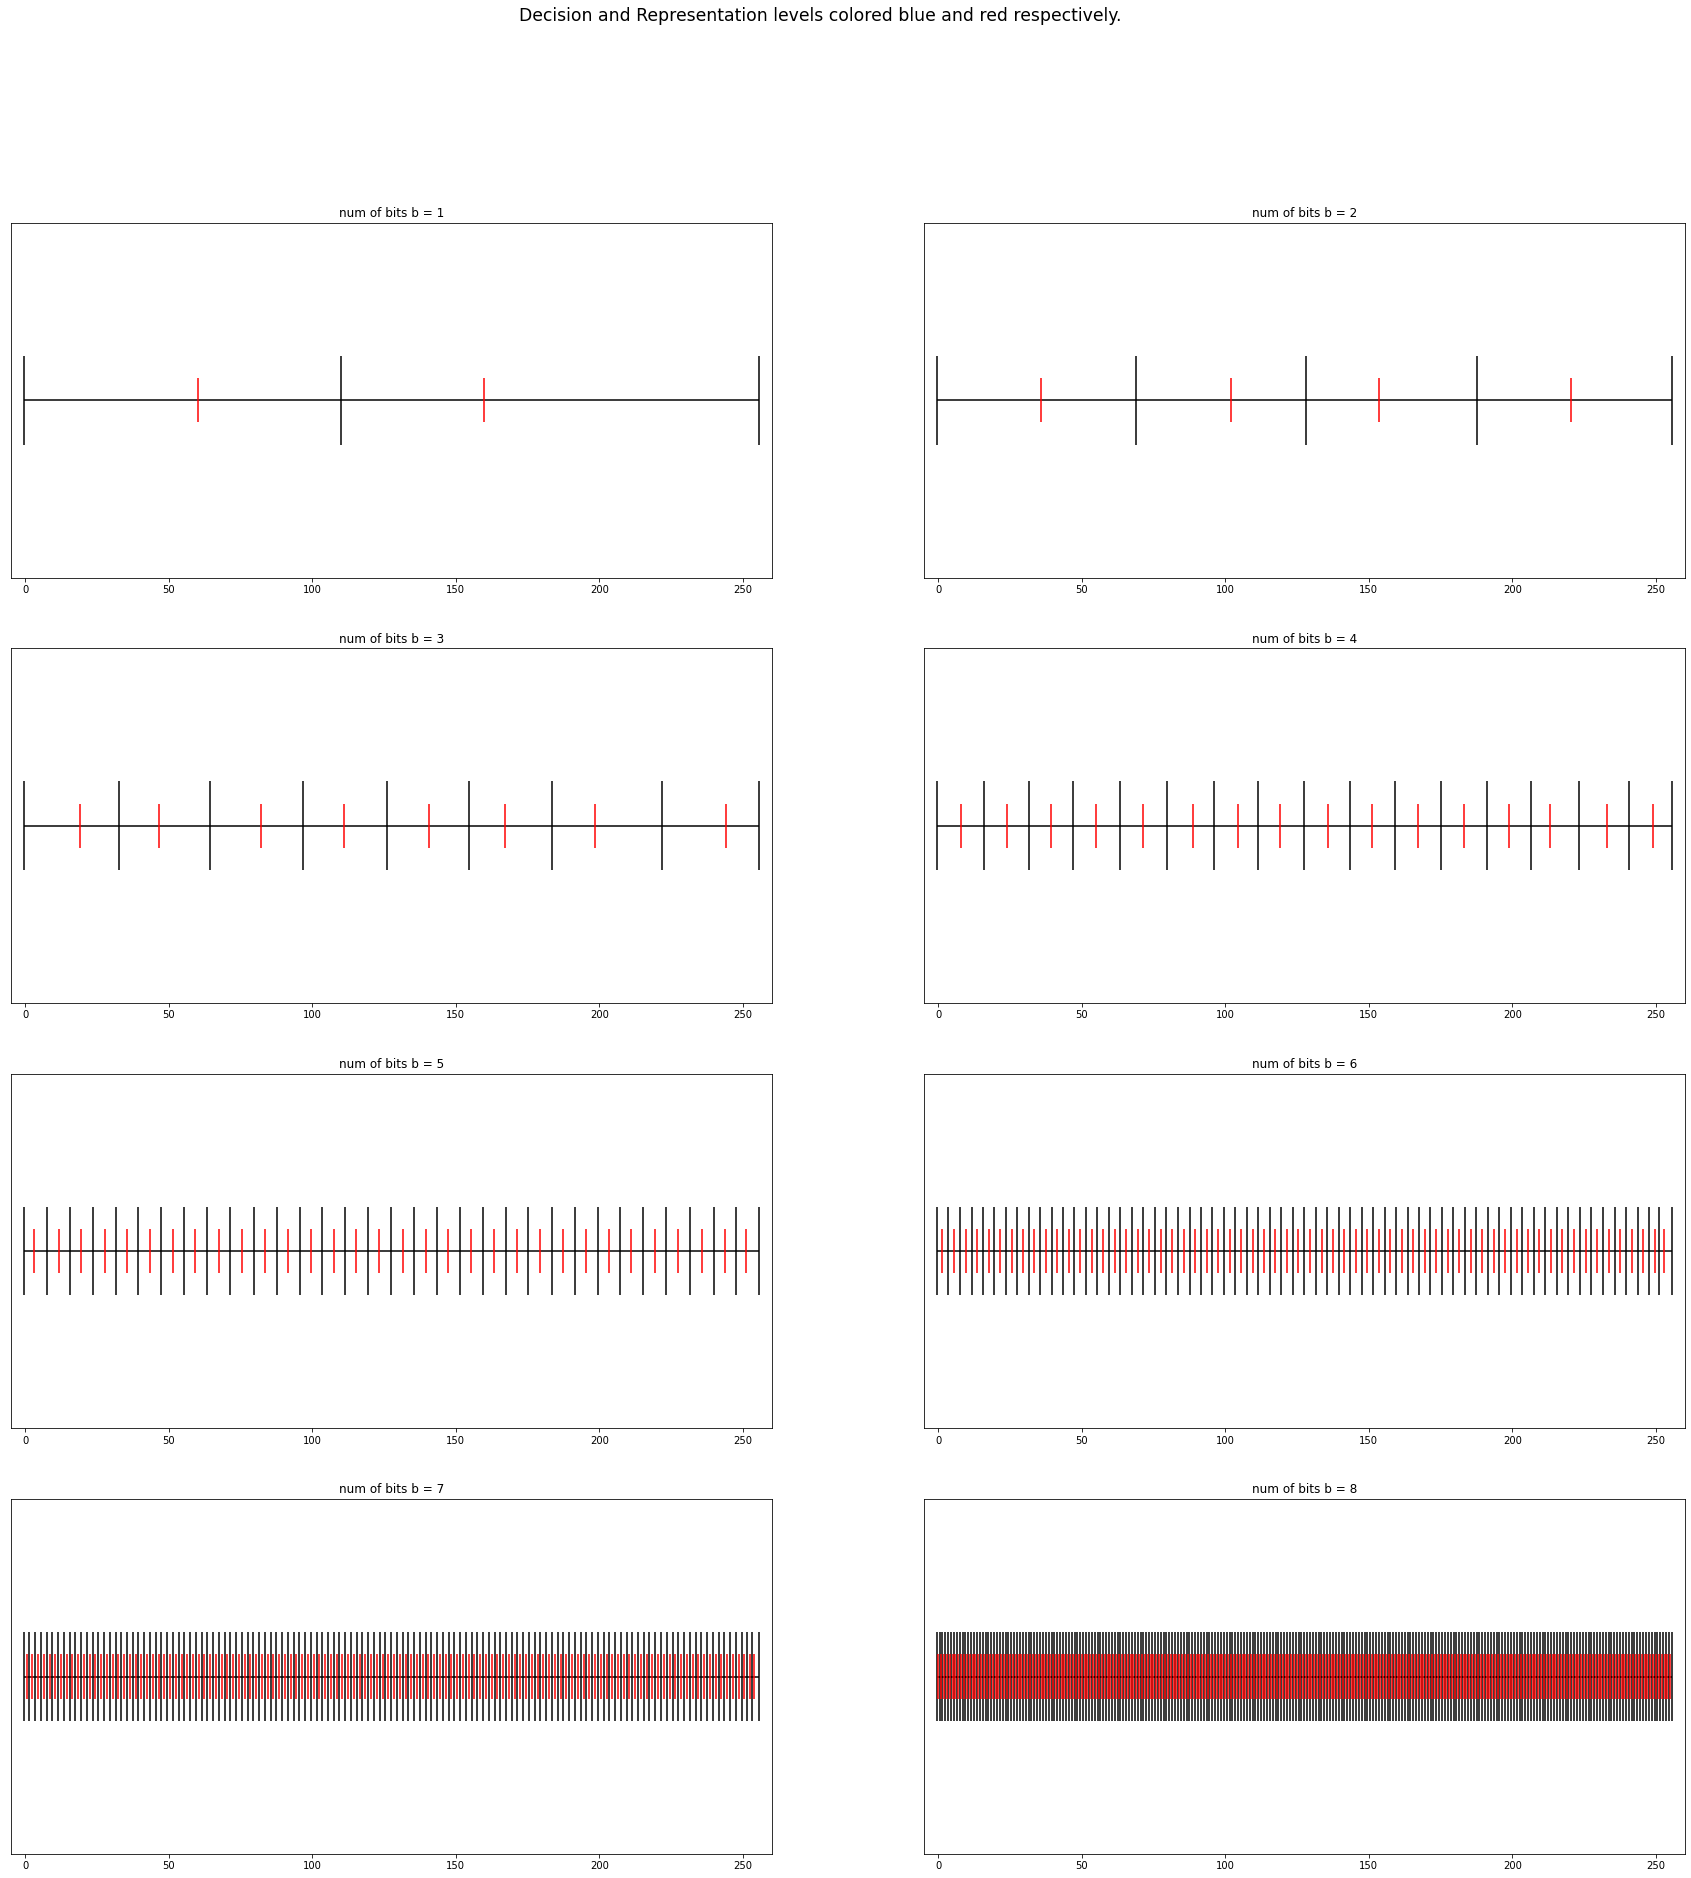

In [ ]:
mse_for_b_bits = [0] * 8  # array for the MSE for every b
r_list = []  # will be a list of lists, with the representation levels for every b
d_list = []  # will be a list of lists, with the decision levels for every b
for b in range(1,9):
    r, d, mse_for_b_bits[b-1] = max_loyd(pdf, get_uni_boundries(b, 256), 0.5)
    r_list.append(r)
    d_list.append(d)
    print("for b = %s: %s" % (b, mse_for_b_bits[b-1]) )
# clause a: MSE as a function
mse_for_b_bits_ML_series = pd.Series(mse_for_b_bits)
plt.scatter(mse_for_b_bits_ML_series.index + 1, mse_for_b_bits_ML_series)

# clause b: plot of the decision and represantation levels
plot_quantization(d_list, r_list)

Q4. c)

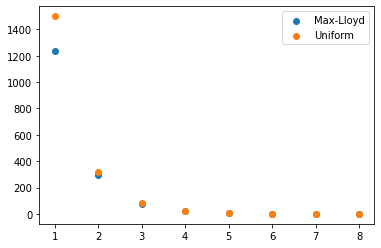

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(mse_for_b_bits_ML_series.index + 1, mse_for_b_bits_ML_series, label='Max-Lloyd')
ax1.scatter(mse_for_b_bits_uni_series.index + 1, mse_for_b_bits_uni_series, label='Uniform')
plt.legend(loc='upper right')
plt.show()
